# Projeto de filtro IIR - Exemplo

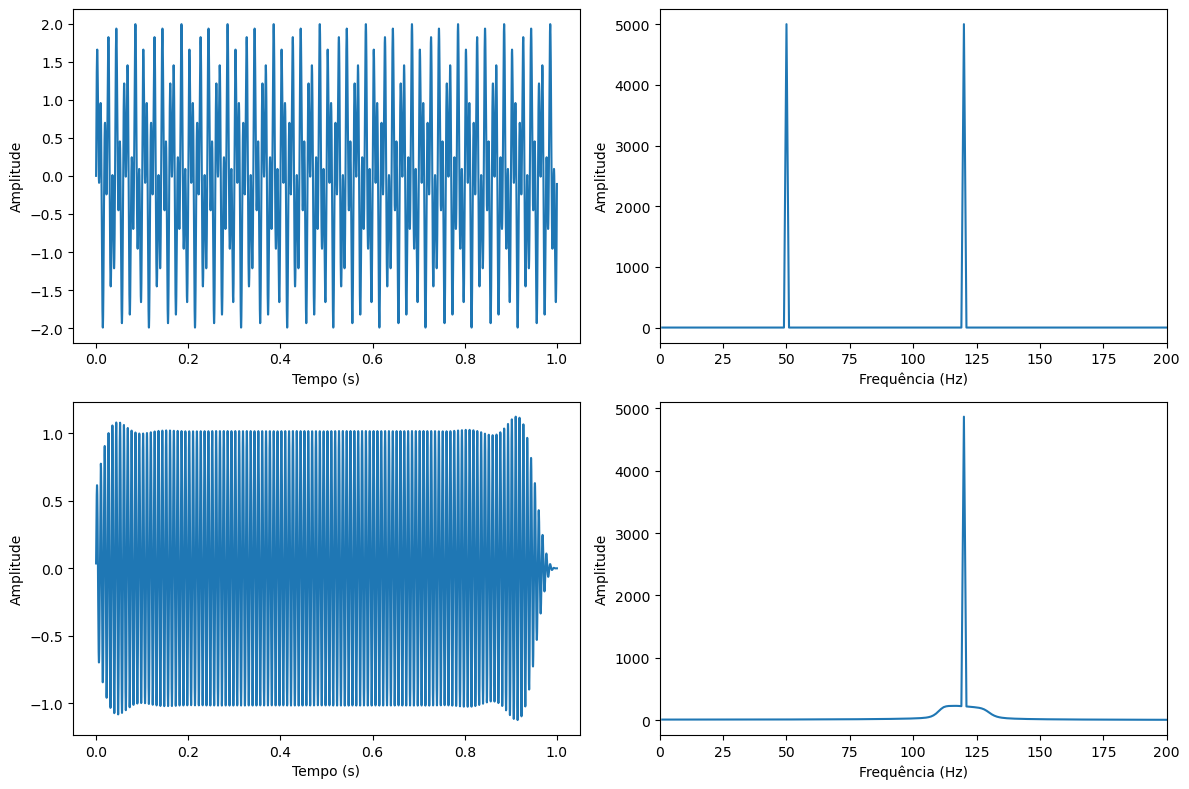

In [10]:
import numpy as np
from scipy import signal, fftpack
import matplotlib.pyplot as plt

# Definir frequência de amostragem e duração do sinal
fs = 10000
duration = 1

# Definir frequências das senoides
freq1 = 50
freq2 = 120

# Criar sinal de duas senoides
t = np.arange(0, duration, 1/fs)
signal_input = np.sin(2*np.pi*freq1*t) + np.sin(2*np.pi*freq2*t)

# Calcular transformada de Fourier do sinal de entrada
fft_input = fftpack.fft(signal_input)
freqs = fftpack.fftfreq(len(signal_input)) * fs

# Criar filtro IIR passa faixa para manter componente de 120Hz
nyq = 0.5 * fs
low = 110 / nyq
high = 130 / nyq
N = 4
b, a = signal.iirfilter(N, [low, high], btype='band', analog=False, ftype='butter')

# Aplicar filtro ao sinal de entrada
signal_output = signal.filtfilt(b, a, signal_input)

# Calcular transformada de Fourier do sinal de saída
fft_output = fftpack.fft(signal_output)

# Plotar o sinal de entrada e saída, juntamente com suas transformadas de Fourier
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].plot(t, signal_input, label='Sinal de entrada')
ax[0, 0].set_xlabel('Tempo (s)')
ax[0, 0].set_ylabel('Amplitude')

ax[0, 1].plot(freqs[freqs>0], np.abs(fft_input)[np.where(freqs>0)], label='Transformada de Fourier')
ax[0, 1].set_xlabel('Frequência (Hz)')
ax[0, 1].set_ylabel('Amplitude')
ax[0, 1].set_xlim(0, 200)

ax[1, 0].plot(t, signal_output, label='Sinal de saída')
ax[1, 0].set_xlabel('Tempo (s)')
ax[1, 0].set_ylabel('Amplitude')

ax[1, 1].plot(freqs[freqs>0], np.abs(fft_output)[np.where(freqs>0)], label='Transformada de Fourier')
ax[1, 1].set_xlabel('Frequência (Hz)')
ax[1, 1].set_ylabel('Amplitude')
ax[1, 1].set_xlim(0, 200)

plt.tight_layout()
plt.show()
